# Utils

> little functions to tell you the basics of a module

In [ ]:
#| default_exp utils

## imports

In [ ]:
#| export
from __future__ import print_function
from __future__ import annotations
annotations = annotations
import inspect, torch

## Expand cells

In [ ]:
#| exporti
def expandcell():
    "expand cells of the current notebook to its full width"
    from IPython.display import display, HTML 
    display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
#| exporti
expand = expandcell()

In [ ]:
#| export
def ppn(num):
    if num < 1000: print(num)
    elif num < 1000_000: print(str(round(num/1_000,2)) + "K", " == {:,}".format(num))
    elif num < 1000_000_000: print(str(round(num/1_000_000,2)) + "MM", " == {:,}".format(num))
    elif num < 1000_000_000_000: print(str(round(num/1_000_000_000,2)) + "Bn", " == {:,}".format(num))       
    elif num < 1000_000_000_000_000: print(str(round(num/1_000_000_000_000,2)) + "Tn", " == {:,}".format(num))                
#     print("{:,}".format(num), "==", str(num/1_000_000) + "MM", \
#           "==", str(round(num/1_000_000_000,2)) + "Bn", "==", str(round(num/1_000_000_000_000,2)) + "Tn")

In [ ]:
for num in [121,23424,1231423423, 1423432423434]:
    ppn(num)

121
23.42K  == 23,424
1.23Bn  == 1,231,423,423
1.42Tn  == 1,423,432,423,434


## Jupyter theme

In [ ]:
# https://stackoverflow.com/questions/56044487/toolbar-not-visible-after-setting-jupyter-notebook-theme
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [ ]:
!jt -t solarizedd -T -N -kl

## Data

### L

In [ ]:
#| export
from fastcore.foundation import L

In [ ]:
#| export
L = L

### Path

In [ ]:
#| export
from pathlib import *

In [ ]:
#| export
Path = Path

### check_subfolders_img

In [ ]:
#| export
# from fastai.vision.all import *

In [ ]:
# #| export
# # @snoop
# def check_subfolders_img(path, db=False):
#     from pathlib import Path
#     for entry in path.iterdir():
#         if entry.is_file():
#             print(f'{str(entry.absolute())}')
#     for entry in path.iterdir():
#         if entry.is_dir() and not entry.name.startswith(".") and len(entry.ls(file_exts=image_extensions)) > 5:
#             print(f'{str(entry.parent.absolute())}: {len(entry.ls(file_exts=image_extensions))}  {entry.name}')
# #             print(entry.name, f': {len(entry.ls(file_exts=[".jpg", ".png", ".jpeg", ".JPG", ".jpg!d"]))}') # how to include both png and jpg
#             if db:
#                 for e in entry.ls(): # check any image file which has a different suffix from those above
#                     if e.is_file() and not e.name.startswith(".") and e.suffix not in image_extensions and e.suffix not in [".ipynb", ".py"]:
#     #                 if e.suffix not in [".jpg", ".png", ".jpeg", ".JPG", ".jpg!d"]:
#                         pp(e.suffix, e)
#                         try:
#                             pp(Image.open(e).width)
#                         except:
#                             print(f"{e} can't be opened")
#     #                     pp(Image.open(e).width if e.suffix in image_extensions)
#         elif entry.is_dir() and not entry.name.startswith("."): 
# #             with snoop:
#             count_files_in_subfolders(entry)

### randomdisplay(path, db=False)

In [ ]:
#| export
from pathlib import *

In [ ]:
# #| export
# # @snoop
# def randomdisplay(path, db=False):
# # https://www.geeksforgeeks.org/python-random-module/
#     import random
#     if type(path) == PosixPath:
#         rand = random.randint(0,len(path.ls())-1) # choose a random int between 0 and len(T-rex)-1
#         file = path.ls()[rand]
#     elif type(path) == L:
#         rand = random.randint(0,len(path)-1) # choose a random int between 0 and len(T-rex)-1
#         file = path[rand]
#     im = PILImage.create(file)
#     if db: pp(im.width, im.height, file)
#     pp(file)
#     return im

## Plotting
basic plotting [lines](https://www.geeksforgeeks.org/graph-plotting-python-set-3/), [animation](https://www.geeksforgeeks.org/graph-plotting-python-set-3/)

### single_func plot

In [ ]:
#| export
def plot_func(x, y, label_x=None, label_y=None, title=None):
    import matplotlib.pyplot as plt
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel(label_x)
    # naming the y axis
    plt.ylabel(label_y)

    # giving a title to my graph
    plt.title(title)

    # function to show the plot
    plt.show()


In [ ]:
# plot_func(x, y, 'x - axis', 'y - axis', 'My first graph!')

### multiple-line plot

In [ ]:
#| export
# @snoop
def plot_funcs(*lines, # eg., (x1,y1, "line1"),(x2,y2, "line2"), (y1, y2, "line3")
               label_x=None, 
               label_y=None, 
               title=None, 
               ax_center=False):
    import matplotlib.pyplot as plt

    if ax_center:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.spines['left'].set_position('center') 
        ax.spines['bottom'].set_position('center') 
    #     ax.spines['right'].set_position('center') # has no y ticks, so no use for us
    #     ax.spines['top'].set_position('center') # has no x ticks, so no use for us
        ax.spines['right'].set_color('none') # make the right side line (of the box) disappear
        ax.spines['top'].set_color('none') # make the left side line (of the box) disappear
    
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
    
    plt.xlabel(label_x, loc='right')
    plt.ylabel(label_y, loc='bottom')
    
    xys_lst = [(l[0], l[1], l[2]) for l in lines]
    for idx, xys in enumerate(xys_lst):
        plt.plot(xys[0], xys[1], label=xys[2])

    plt.title(title)
    plt.legend()
    plt.show()
#     # add color and other features
#     plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
#          marker='o', markerfacecolor='blue', markersize=12)

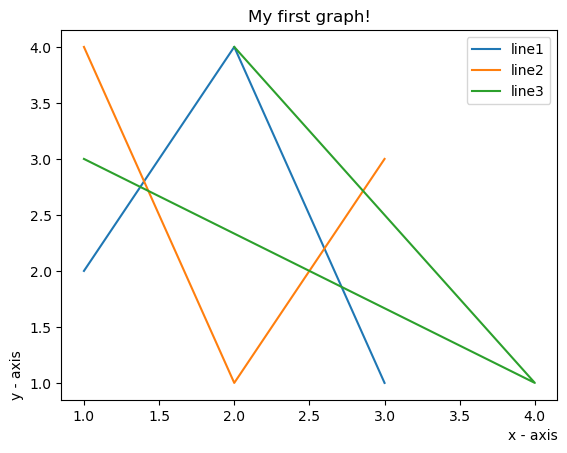

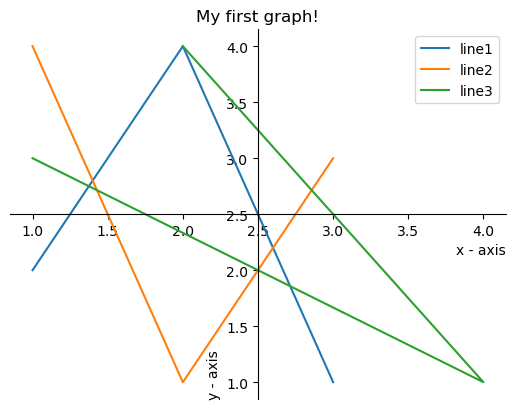

In [ ]:
x1 = [1,2,3]
y1 = [2,4,1]
x2 = [1,2,3]
y2 = [4,1,3]
plot_funcs((x1,y1, "line1"),(x2,y2, "line2"), (y1, y2, "line3"), label_x='x - axis', label_y='y - axis', title='My first graph!')
plot_funcs((x1,y1, "line1"),(x2,y2, "line2"), (y1, y2, "line3"), label_x='x - axis', label_y='y - axis', title='My first graph!', ax_center=True)

In [ ]:
len((1,2))

2

In [ ]:
#| export
# @snoop
def plot_fns(*funcs, # eg., (func1, ), (func2, ) or (func2, 'x**2'), (func1, 'log(x)')
               label_x=None, 
               label_y=None, 
               title=None, 
               ax_center=False):
    import matplotlib.pyplot as plt

    if ax_center:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.spines['left'].set_position('center') 
        ax.spines['bottom'].set_position('center') 
        ax.spines['right'].set_color('none') # make the right side line (of the box) disappear
        ax.spines['top'].set_color('none') # make the left side line (of the box) disappear
    
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

    plt.xlabel(label_x, loc='right')
    plt.ylabel(label_y, loc='bottom')
    
    fnlb_lst = [(f[0], f[1]) if len(f) > 1 else (f[0],) for f in funcs ]
    
    import torch, numpy as np
    for fnlb in fnlb_lst:
        if "np" in inspect.getsource(fnlb[0] ):
            x = np.linspace(-np.pi,np.pi,100)
        elif "torch" in inspect.getsource(fnlb[0] ):
            x = torch.linspace(-torch.pi, torch.pi, 100)

    from fastai.torch_core import ifnone
    for idx, fnlb in enumerate(fnlb_lst):
        plt.plot(x, fnlb[0](x), label=fnlb[1] if len(fnlb)>1 else "line {}".format(idx))

    plt.title(title)
    plt.legend() # plt.legend(loc='upper left')
    plt.show()
#     # add color and other features
#     plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
#          marker='o', markerfacecolor='blue', markersize=12)

In [ ]:
# inspect.getsource(func2)

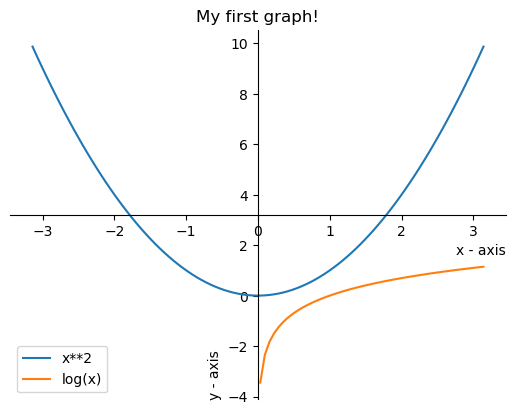

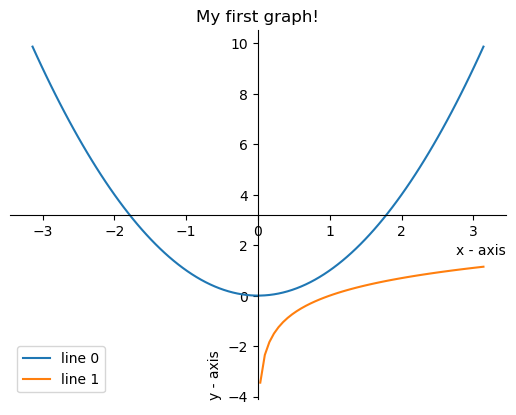

In [ ]:
func1 = lambda x: x**2
func2 = lambda x: torch.log(x) # torch.log(x)
plot_fns((func1, "x**2"), (func2, "log(x)"), label_x='x - axis', label_y='y - axis', title='My first graph!', ax_center=True)
plot_fns((func1, ), (func2, ), label_x='x - axis', label_y='y - axis', title='My first graph!', ax_center=True)

## doc and show_doc

In [ ]:
#| export
from fastai.torch_core import doc

In [ ]:
#| export
doc = doc

In [ ]:
#| export
from nbdev.showdoc import show_doc

In [ ]:
#| export
show_doc = show_doc

## snoop: pp, @snoop, doc_sig, src, chk

In [ ]:
#| export
from snoop import snoop, pp

In [ ]:
#| export
snoop = snoop
pp = pp

In [ ]:
#| export 
def snoopon(): snoop.install(enabled=True)

In [ ]:
#| export
def snoopoff(): snoop.install(enabled=False)

In [ ]:
from fastcore.foundation import L
from fastai.torch_core import tensor

In [ ]:
tensor(1,2,3).__len__()
L([1,2,3]).__len__()

3

In [ ]:
#| export
def chk(obj):
    "return obj's type, length and type if available"
    tp = type(obj)
    length = obj.__len__() if hasattr(obj, '__len__') else "no length"
    shape = obj.shape if hasattr(obj, 'shape') else "no shape"
    return tp, length, shape

In [ ]:
#| export
def doc_sig(func):
    import inspect
    sig = inspect.signature(func) if callable(func) else "no signature"
    doc = inspect.getdoc(func) if inspect.getdoc(func) != None else "no doc"
    return  getattr(func, '__mro__', "no mro"), doc, sig

In [ ]:
#| export
def src(func):
    try: 
        print(inspect.getsource(func))
    except: 
        print(f"can't get srcode from inspect.getsource")

In [ ]:
src(doc_sig)

def doc_sig(func):
    import inspect
    sig = inspect.signature(func) if callable(func) else "no signature"
    doc = inspect.getdoc(func) if inspect.getdoc(func) != None else "no doc"
    return  getattr(func, '__mro__', "no mro"), doc, sig



In [ ]:
#| exporti
def doc_sig_complex(func):
    import inspect        
    if not inspect.isfunction(func) or not inspect.ismethod(func):
        func = getattr(func, '__class__', None)
        if func == None: 
            info = 'not a func, method, nor a class'
        else: 
            info = "it's a class"
    doc = inspect.getdoc(func) if hasattr(func, '__doc__') else "no doc"
    sig = inspect.signature(func) if callable(func) else "no signature"
    mro = getattr(func, '__mro__', "no mro")
    return info, doc, sig, mro

In [ ]:
#| exporti
def type_watch(source, value):
    if value != None:
        return 'type({})'.format(source), type(value)

In [ ]:
#| exporti
def sig_watch(source, value):
    if inspect.isfunction(value):
        return 'sig({})'.format(source), inspect.signature(value)

In [ ]:
#| exporti
def view(data): return (data.mean(), data.std())

In [ ]:
from torch import tensor
import torch

In [ ]:
isinstance(tensor([1,2,3]), torch.Tensor)

True

In [ ]:
#| exporti
def stats_watch(source, value):
    if (isinstance(value, np.ndarray) or isinstance(value, torch.Tensor)): 
        return '{} stats: '.format(source), view(value)

In [ ]:
[1, 2] + [2, 3]

[1, 2, 2, 3]

In [ ]:
#| exporti
def snoop_onoff(on=True):
    "activate or deactivate @snoop, pp, but not %%snoop in a cell which is activated by %load_ext snoop"
    import snoop
    from snoop.configuration import len_shape_watch
#     snoop.install(replace_watch_extras=[type_watch, len_shape_watch, sig_watch, stats_watch])
    snoop.install(replace_watch_extras=[]) # this is much simpler to read


In [ ]:
#| exporti 
snoop_no_config = snoop_onoff() # # no import or config for using snoop now

In [ ]:
snoop_config = """
# snoop_onoff()
# snoop.install(watch_extras=[type_watch, stats_watch])
from snoop.configuration import len_shape_watch
snoop.install(replace_watch_extras=[type_watch, len_shape_watch, sig_watch, stats_watch])
"""


## multi_output
setup for exporting to a module

In [ ]:
#| export
import os

In [ ]:
#| exporti
def multi_output():
    from IPython.core.interactiveshell import InteractiveShell
    InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#| exporti
multioutput = multi_output()

In [ ]:
a = [1,2,3]
b = [4,5,6]
a
b

[1, 2, 3]

[4, 5, 6]

## nb_url, nb_name, nb_path
how to get current notebook's name, path and url

In [ ]:
#| export
def nb_url():
    "run this func to get nb_url of this current notebook"
    import ipyparams
    return eval("ipyparams.raw_url")

In [ ]:
nb_url()

<IPython.core.display.Javascript object>

''

In [ ]:
#| export
def nb_path():
    "run this func to get nb_path of this current notebook"
    import ipyparams
    return eval("os.path.join(os.getcwd(), ipyparams.notebook_name)")

In [ ]:
nb_path()

'/Users/Natsume/Documents/fastdebug/nbs/lib/'

In [ ]:
#| export
def nb_name():
    "run this func to get nb_path of this current notebook"
    import ipyparams
    return eval("ipyparams.notebook_name")

In [ ]:
nb_name()

''

## ipy2md
how to convert ipynb to md automatically; how to run commands in python

In [ ]:
#| export
def ipy2md(db=True):
    "convert the current notebook to md"
    import ipyparams
    import os
    path = nb_path()
    name = nb_name()
    url = nb_url()
    obs_path = "/Users/Natsume/Documents/divefastai/Debuggable/jupytext"
    obs_last_folder = nb_path().split(nb_name())[0].split('/')[-2]
    obs_output_path = "/Users/Natsume/Documents/divefastai/Debuggable/nbconvert"    
    mds_path = path.replace("nbs", "mds").split(name)[0]
    mds_output = "/Users/Natsume/Documents/fastdebug/mds_output"
    # https://stackabuse.com/executing-shell-commands-with-python/
    os.system(f"jupytext --to md {path}")
    os.system(f"cp {path.split('.ipynb')[0]+'.md'} {obs_path + '/' + obs_last_folder}")
    if db: print(f'cp to : {obs_path + "/" + obs_last_folder}')
    os.system(f"mv {path.split('.ipynb')[0]+'.md'} {mds_path}")
    if db: print(f'move to : {mds_path}')
    os.system(f"jupyter nbconvert --to markdown {path}")
    os.system(f"cp {path.split('.ipynb')[0]+'.md'} {mds_output}")
    os.system(f"mv {path.split('.ipynb')[0]+'.md'} {obs_output_path}")
    if db: print(f'copy to : {mds_output}')
    if db: print(f'move to : {obs_output_path}')        

In [ ]:
# ipy2md()

In [ ]:
# #| export
# def ipy2md(db=False):
#     "convert the current notebook to md"
#     path, name, url = get_notebook_path()
#     obs_path = "/Users/Natsume/Documents/divefastai/Debuggable/jupytext"
#     mds_path = path.replace("nbs", "mds").split(name)[0]
#     mds_output = "/Users/Natsume/Documents/fastdebug/mds_output"
#     if db: 
#         print(f'path: {path}')
#         print(f'mds_path: {mds_path}')
#     eval(f'!jupytext --to md {path}')
#     eval(f'!cp {path.split(".ipynb")[0]+".md"} {obs_path}')
#     eval(f'!mv {path.split(".ipynb")[0]+".md"} {mds_path}')
#     eval(f'!jupyter nbconvert --to markdown {path}')
#     eval(f'!mv {path.split(".ipynb")[0]+".md"} {mds_output}')

In [ ]:
# ipy2md()

## automagic for autoreload and matplotlib inline

As mentioned above, you need the autoreload extension. If you want it to automatically start every time you launch ipython, you need to add it to the ipython_config.py startup file:

It may be necessary to generate one first:
```python
ipython profile create
```
Then include these lines in ~/.ipython/profile_default/ipython_config.py:

```python
c.InteractiveShellApp.exec_lines = []
c.InteractiveShellApp.exec_lines.append('%load_ext autoreload')
c.InteractiveShellApp.exec_lines.append('%autoreload 2')
c.InteractiveShellApp.exec_lines.append('%matplotlib inline')
c.InteractiveShellApp.exec_lines.append('%load_ext snoop')
```

As well as an optional warning in case you need to take advantage of compiled Python code in .pyc files:
```python
c.InteractiveShellApp.exec_lines.append('print("Warning: disable autoreload in ipython_config.py to improve performance.")')
```

### If individual notebook, I can just run the function below to setup autoreload

In [ ]:
#| export
def automagics():
    from IPython.core.interactiveshell import InteractiveShell
    get_ipython().run_line_magic(magic_name="load_ext", line = "autoreload")
    get_ipython().run_line_magic(magic_name="autoreload", line = "2")
    get_ipython().run_line_magic(magic_name="matplotlib", line = "inline")
    get_ipython().run_line_magic(magic_name="load_ext", line = "snoop")

## Import fastcore env

In [ ]:
#| export
from fastcore.test import * # so that it automated

In [ ]:
#| export
test_eq = test_eq
test_is = test_is

In [ ]:
#| export 
from fastcore.imports import FunctionType, MethodType

In [ ]:
#| export
FunctionType = FunctionType
MethodType = MethodType

## to inspect a class

In [ ]:

def inspect_class(c):
    "examine the details of a class"
    try:
        print(inspect.getsource(c))
    except: 
        pass
    print()
    print(f'is {c.__name__} a metaclass: {ismetaclass(c)}')
    print(f'is {c.__name__} created by a metaclass: {False if c.__class__ == type else True}')
    if c.__class__ is not type:
        print(f'{c.__name__} is created by metaclass {c.__class__}')
    else:
        print(f'{c.__name__} is created by {c.__class__}')
    print(f'{c.__name__}.__new__ is object.__new__: {c.__new__ is object.__new__}')   
    print(f'{c.__name__}.__new__ is type.__new__: {c.__new__ is type.__new__}')       
    print(f'{c.__name__}.__new__: {c.__new__}')
    print(f'{c.__name__}.__init__ is object.__init__: {c.__init__ is object.__init__}')
    print(f'{c.__name__}.__init__ is type.__init__: {c.__init__ is type.__init__}')    
    print(f'{c.__name__}.__init__: {c.__init__}')
    print(f'{c.__name__}.__call__ is object.__call__: {c.__call__ is object.__call__}')
    print(f'{c.__name__}.__call__ is type.__call__: {c.__call__ is type.__call__}')    
    print(f'{c.__name__}.__call__: {c.__call__}')
    print(f'{c.__name__}.__class__: {c.__class__}')
    print(f'{c.__name__}.__bases__: {c.__bases__}')
    print(f'{c.__name__}.__mro__: {c.__mro__}')
    
    if c.__class__ is not type:
        print()
        print(f'{c.__name__}\'s metaclass {c.__class__}\'s function members are:')
        funcs = {item[0]: item[1] for item in inspect.getmembers(c.__class__) \
                 if inspect.isfunction(getattr(c.__class__, item[0], None))}   
        pprint(funcs)
        
    
    
    funcs = {item[0]: item[1] for item in inspect.getmembers(c) \
             if inspect.isfunction(getattr(c, item[0], None))}
    methods = {item[0]: item[1] for item in inspect.getmembers(c) \
             if inspect.ismethod(getattr(c, item[0], None))}
    classes = {item[0]: item[1] for item in inspect.getmembers(c) \
             if inspect.isclass(getattr(c, item[0], None))}
    
    print()
    print(f'{c.__name__}\'s function members are:')
    pprint(funcs)
    print()
    print(f'{c.__name__}\'s method members are:')
    pprint(methods)
    print()
    print(f'{c.__name__}\'s class members are:')
    pprint(classes)
    print()
    print(f'{c.__name__}\'s namespace are:')
    pprint(c.__dict__)

### get the docs for each function of a class

In [ ]:
#| export 
def inspect_class(c, src=False):
    "examine the details of a class"
    if src:
        try:
            print(inspect.getsource(c))
        except: 
            pass
    print()
    print(f'is {c.__name__} a metaclass: {ismetaclass(c)}')
    print(f'is {c.__name__} created by a metaclass: {False if c.__class__ == type else True}')
    if c.__class__ is not type:
        print(f'{c.__name__} is created by metaclass {c.__class__}')
    else:
        print(f'{c.__name__} is created by {c.__class__}')
    print(f'{c.__name__}.__new__ is object.__new__: {c.__new__ is object.__new__}')   
    print(f'{c.__name__}.__new__ is type.__new__: {c.__new__ is type.__new__}')       
    print(f'{c.__name__}.__new__: {c.__new__}')
    print(f'{c.__name__}.__init__ is object.__init__: {c.__init__ is object.__init__}')
    print(f'{c.__name__}.__init__ is type.__init__: {c.__init__ is type.__init__}')    
    print(f'{c.__name__}.__init__: {c.__init__}')
    print(f'{c.__name__}.__call__ is object.__call__: {c.__call__ is object.__call__}')
    print(f'{c.__name__}.__call__ is type.__call__: {c.__call__ is type.__call__}')    
    print(f'{c.__name__}.__call__: {c.__call__}')
    print(f'{c.__name__}.__class__: {c.__class__}')
    print(f'{c.__name__}.__bases__: {c.__bases__}')
    print(f'{c.__name__}.__mro__: {c.__mro__}')
    
    if c.__class__ is not type:
        print()
        print(f'{c.__name__}\'s metaclass {c.__class__}\'s function members are:')
        funcs = {item[0]: item[1] for item in inspect.getmembers(c.__class__) \
                 if inspect.isfunction(getattr(c.__class__, item[0], None))}   
        pprint(funcs)
        
    funcs = {item[0]: item[1] for item in inspect.getmembers(c) \
             if inspect.isfunction(getattr(c, item[0], None))}
    methods = {item[0]: item[1] for item in inspect.getmembers(c) \
             if inspect.ismethod(getattr(c, item[0], None))}
    classes = {item[0]: item[1] for item in inspect.getmembers(c) \
             if inspect.isclass(getattr(c, item[0], None))}
    
    print()
    print(f'{c.__name__}\'s function members are:')
    # todos: print some space between k and v
    for k, v in funcs.items():
        print(f"{k}: {inspect.getdoc(v)}")
    print()
    print(f'{c.__name__}\'s method members are:')
    pprint(methods)
    print()
    print(f'{c.__name__}\'s class members are:')
    pprint(classes)
    print()
    print(f'{c.__name__}\'s namespace are:')
    pprint(c.__dict__)

## is it a metaclass?

In [ ]:
#| export
def ismetaclass(mc): 
    "check whether a class is a metaclass or not"
    if inspect.isclass(mc):
        return type in mc.__mro__ 
    else: return False

In [ ]:
from fastcore.meta import *
import inspect

In [ ]:
ismetaclass(FixSigMeta)

True

In [ ]:
ismetaclass(PrePostInitMeta)

True

## is it a decorator

In [ ]:

def isdecorator(obj):
    if inspect.isfunction(obj):
        count = 0
        defretn = ""
        for l in inspect.getsource(obj).split('\n'):
            if "def " in l:
                if count >=1:
                    defretn = l
                count = count + 1
            if "return " in l and "partial(" in l:
                return True
            if "return " in l: 
                retn = l.split('return ')[1]
                if "(" not in retn:
                    if retn in defretn:
                        return True
                    try:
                        retneval = eval(retn, obj.__globals__)
                    except NameError:
                        return False
                    if type(retneval).__name__ == 'function':
                        return True
                
        return False


### handle all kinds of exceptions for evaluating retn 

In [ ]:
#| export
def isdecorator(obj):
    "check whether a function is a decorator"
    if inspect.isfunction(obj):
        count = 0
        defretn = ""
        for l in inspect.getsource(obj).split('\n'):
            if "def " in l:
                if count >=1:
                    defretn = l
                count = count + 1
            if "return " in l and "partial(" in l:
                return True
            if "return " in l: 
                retn = l.split('return ')[1]
                if "(" not in retn:
                    if retn in defretn:
                        return True
                    try:
                        retneval = eval(retn, obj.__globals__)
                    except:
                        return False
                    if type(retneval).__name__ == 'function':
                        return True
                
        return False
    else: return False


In [ ]:
test_eq(isdecorator(delegates), True)

In [ ]:
test_eq(isdecorator(test_sig), False)

## whatinside a module of a library

In [ ]:
#| export
# from inspect import getmembers, isfunction, isclass, isbuiltin, getsource
import os.path, pkgutil
from pprint import pprint
import inspect


In [ ]:

def whatinside(mo, # module, e.g., `import fastcore.all as fa`, use `fa` here
               dun:bool=False, # print all items in __all__
               func:bool=False, # print all user defined functions
               clas:bool=False, # print all class objects
               bltin:bool=False, # print all builtin funcs or methods
               lib:bool=False, # print all the modules of the library it belongs to
               cal:bool=False # print all callables
             ): 
    'Check what inside a module: `__all__`, functions, classes, builtins, and callables'
    dun_all = len(mo.__all__) if hasattr(mo, "__all__") else 0
    funcs = inspect.getmembers(mo, inspect.isfunction)
    classes = inspect.getmembers(mo, inspect.isclass)
    builtins = inspect.getmembers(mo, inspect.isbuiltin)
    callables = inspect.getmembers(mo, callable)
    pkgpath = os.path.dirname(mo.__file__)
    if not lib:
        print(f"{mo.__name__} has: \n{dun_all} items in its __all__, and \n{len(funcs)} user defined functions, \n{len(classes)} classes or class objects, \n{len(builtins)} builtin funcs and methods, and\n{len(callables)} callables.\n")  
    if hasattr(mo, "__all__") and dun: pprint(mo.__all__)
    if func: 
        print(f'The user defined functions are:')
        pprint([i[0] for i in funcs])
    if clas: 
        print(f'The class objects are:')
        pprint([i[0] for i in classes])
    if bltin: 
        print(f'The builtin functions or methods are:')
        pprint([i[0] for i in builtins])
    if cal: 
        print(f'The callables are: ')
        pprint([i[0] for i in callables])
    if lib: 
        modules = [name for _, name, _ in pkgutil.iter_modules([pkgpath])]
        print(f'The library has {len(modules)} modules')
        pprint(modules)

### show the type of objects inside `__all__`

In [ ]:

def whatinside(mo, # module, e.g., `import fastcore.all as fa`, use `fa` here
               dun:bool=False, # print all items in __all__
               func:bool=False, # print all user defined functions
               clas:bool=False, # print all class objects
               bltin:bool=False, # print all builtin funcs or methods
               lib:bool=False, # print all the modules of the library it belongs to
               cal:bool=False # print all callables
             ): 
    'Check what inside a module: `__all__`, functions, classes, builtins, and callables'
    dun_all = len(mo.__all__) if hasattr(mo, "__all__") else 0
    funcs = inspect.getmembers(mo, inspect.isfunction)
    classes = inspect.getmembers(mo, inspect.isclass)
    builtins = inspect.getmembers(mo, inspect.isbuiltin)
    callables = inspect.getmembers(mo, callable)
    pkgpath = os.path.dirname(mo.__file__)
    module_env = mo.__dict__
    kind = None # assignment first before reference
    if not lib:
        print(f"{mo.__name__} has: \n{dun_all} items in its __all__, and \n{len(funcs)} user defined functions, \n{len(classes)} classes or class objects, \n{len(builtins)} builtin funcs and methods, and\n{len(callables)} callables.\n")  
    if hasattr(mo, "__all__") and dun: 
        maxlen = max(map(lambda i : len(i) , mo.__all__ ))
        for i in mo.__all__:
            obj = eval(i, module_env)
            if ismetaclass(obj):
                kind = "metaclass" 
            elif inspect.isclass(obj):
                kind = "class"
            elif isdecorator(obj):
                kind = "decorator"
            elif inspect.isfunction(obj):
                kind = "function"
            tp = type(eval(i, module_env)).__name__
            startlen = len(i)
            if tp == kind: print(i + ":" + " "*(maxlen-startlen + 5) + kind + "    " + \
                                 inspect.getdoc(eval(i, module_env)))  
            elif tp != 'NoneType': print(i + ":" + " "*(maxlen-startlen+5) + kind + ", " + tp + "    " + \
                                 inspect.getdoc(eval(i, module_env)))
            else: print(i + ":" + tp)
    if func: 
        print(f'The user defined functions are:')
        maxlen = max(map(lambda i : len(i[0]) , funcs ))
        for i in funcs:
            if isdecorator(i[1]):
                kind = "decorator"
            elif inspect.isfunction(i[1]):
                kind = "function"
#             print(f"{i[0]}: {kind}")  
            startlen = len(i[0])
            print(i[0] + ":" + " "*(maxlen-startlen + 5) + kind + "    " + \
                                 str(inspect.signature(i[1])))               
    if clas: 
        print(f'The class objects are:')
        maxlen = max(map(lambda i : len(i[0]) , funcs ))
        for i in classes:
            if ismetaclass(i[1]):
                kind = "metaclass"
            elif inspect.isclass(i[1]):
                kind = "class"
#             print(f"{i[0]}: {kind}")  
            startlen = len(i[0])
            if not inspect.isbuiltin(i[1]):         
                print(i[0] + ":" + " "*(maxlen-startlen + 5) + kind)
    if bltin: 
        print(f'The builtin functions or methods are:')
        pprint([i[0] for i in builtins])
    if cal: 
        print(f'The callables are: ')
        pprint([i[0] for i in callables])
    if lib: 
        modules = [name for _, name, _ in pkgutil.iter_modules([pkgpath])]
        print(f'The library has {len(modules)} modules')
        pprint(modules)

### working for fastdebug.core

In [ ]:

def whatinside(mo, # module, e.g., `import fastcore.all as fa`, use `fa` here
               dun:bool=False, # print all items in __all__
               func:bool=False, # print all user defined functions
               clas:bool=False, # print all class objects
               bltin:bool=False, # print all builtin funcs or methods
               lib:bool=False, # print all the modules of the library it belongs to
               cal:bool=False # print all callables
             ): 
    'Check what inside a module: `__all__`, functions, classes, builtins, and callables'
    dun_all = len(mo.__all__) if hasattr(mo, "__all__") else 0
    funcs = inspect.getmembers(mo, inspect.isfunction)
    classes = inspect.getmembers(mo, inspect.isclass)
    builtins = inspect.getmembers(mo, inspect.isbuiltin)
    callables = inspect.getmembers(mo, callable)
    pkgpath = os.path.dirname(mo.__file__)
    module_env = mo.__dict__
    kind = None # assignment first before reference
    if not lib:
        print(f"{mo.__name__} has: \n{dun_all} items in its __all__, and \n{len(funcs)} user defined functions, \n{len(classes)} classes or class objects, \n{len(builtins)} builtin funcs and methods, and\n{len(callables)} callables.\n")  
    if hasattr(mo, "__all__") and dun: 
        maxlen = max(map(lambda i : len(i) , mo.__all__ ))
        for i in mo.__all__:
            obj = eval(i, module_env)
            if ismetaclass(obj):
                kind = "metaclass" 
            elif inspect.isclass(obj):
                kind = "class"
            elif isdecorator(obj):
                kind = "decorator"
            elif inspect.isfunction(obj):
                kind = "function"
            tp = type(eval(i, module_env)).__name__
            startlen = len(i)
            if tp == kind: print(i + ":" + " "*(maxlen-startlen + 5) + kind + "    " + \
                                 inspect.getdoc(eval(i, module_env)))  
            elif kind != None and callable(eval(i, module_env)): print(i + ":" + " "*(maxlen-startlen+5) + kind + ", " + tp + "    " + \
                                 str(inspect.getdoc(eval(i, module_env))))
#             elif tp != 'NoneType': print(i + ":" + " "*(maxlen-startlen+5) + kind + ", " + tp + "    " + \
#                                  inspect.getdoc(eval(i, module_env)))
            else: print(i + ":" + tp)
    if func: 
        print(f'The user defined functions are:')
        maxlen = max(map(lambda i : len(i[0]) , funcs ))
        for i in funcs:
            if isdecorator(i[1]):
                kind = "decorator"
            elif inspect.isfunction(i[1]):
                kind = "function"
#             print(f"{i[0]}: {kind}")  
            startlen = len(i[0])
            print(i[0] + ":" + " "*(maxlen-startlen + 5) + kind + "    " + \
                                 str(inspect.signature(i[1])))               
    if clas: 
        print(f'The class objects are:')
        maxlen = max(map(lambda i : len(i[0]) , funcs ))
        for i in classes:
            if ismetaclass(i[1]):
                kind = "metaclass"
            elif inspect.isclass(i[1]):
                kind = "class"
#             print(f"{i[0]}: {kind}")  
            startlen = len(i[0])
            if not inspect.isbuiltin(i[1]):         
                print(i[0] + ":" + " "*(maxlen-startlen + 5) + kind)
    if bltin: 
        print(f'The builtin functions or methods are:')
        pprint([i[0] for i in builtins])
    if cal: 
        print(f'The callables are: ')
        pprint([i[0] for i in callables])
    if lib: 
        modules = [name for _, name, _ in pkgutil.iter_modules([pkgpath])]
        print(f'The library has {len(modules)} modules')
        pprint(modules)

### to show Fastdb methods

In [ ]:
#| export
def whatinside(mo, # module, e.g., `import fastcore.all as fa`, use `fa` here
               dun:bool=False, # print all items in __all__
               func:bool=False, # print all user defined functions
               method:bool=False, 
               clas:bool=False, # print all class objects
               bltin:bool=False, # print all builtin funcs or methods
               lib:bool=False, # print all the modules of the library it belongs to
               cal:bool=False # print all callables
             ): 
    'Check what inside a module: `__all__`, functions, classes, builtins, and callables'
    dun_all = len(mo.__all__) if hasattr(mo, "__all__") else 0
    funcs = inspect.getmembers(mo, inspect.isfunction)
    methods = inspect.getmembers(mo, inspect.ismethod)    
    classes = inspect.getmembers(mo, inspect.isclass)
    builtins = inspect.getmembers(mo, inspect.isbuiltin)
    callables = inspect.getmembers(mo, callable)
    pkgpath = os.path.dirname(mo.__file__)
    module_env = mo.__dict__
    kind = None # assignment first before reference
    if not lib:
        print(f"{mo.__name__} has: \n{dun_all} items in its __all__, and \n{len(funcs)} user defined functions, \n{len(classes)} classes or class objects, \n{len(builtins)} builtin funcs and methods, and\n{len(callables)} callables.\n")  
        print(inspect.getdoc(mo))
    if hasattr(mo, "__all__") and dun: 
        maxlen = max(map(lambda i : len(i) , mo.__all__ ))
        for i in mo.__all__:
            obj = eval(i, module_env)
            if ismetaclass(obj):
                kind = "metaclass" 
            elif inspect.isclass(obj):
                kind = "class"
            elif isdecorator(obj):
                kind = "decorator"
            elif inspect.isfunction(obj):
                kind = "function"
            tp = type(eval(i, module_env)).__name__
            startlen = len(i)
            if tp == kind: print(i + ":" + " "*(maxlen-startlen + 5) + kind + "    " + \
                                 str(inspect.getdoc(eval(i, module_env))))  
            elif kind != None and callable(eval(i, module_env)): print(i + ":" + " "*(maxlen-startlen+5) + kind + ", " + tp + "    " + \
                                 str(inspect.getdoc(eval(i, module_env))))
#             elif tp != 'NoneType': print(i + ":" + " "*(maxlen-startlen+5) + kind + ", " + tp + "    " + \
#                                  inspect.getdoc(eval(i, module_env)))
            else: print(i + ":" + tp)
    if func: 
        print(f'The user defined functions are:')
        maxlen = max(map(lambda i : len(i[0]) , funcs ))
        for i in funcs:
            if isdecorator(i[1]):
                kind = "decorator"
            elif inspect.isfunction(i[1]):
                kind = "function"
#             print(f"{i[0]}: {kind}")  
            startlen = len(i[0])
            print(i[0] + ":" + " "*(maxlen-startlen + 5) + kind + "    " + \
                                 str(inspect.signature(i[1])))               
    if clas: 
        print(f'The class objects are:')
        maxlen = max(map(lambda i : len(i[0]) , funcs ))
        for i in classes:
            if ismetaclass(i[1]):
                kind = "metaclass"
            elif inspect.isclass(i[1]):
                kind = "class"
#             print(f"{i[0]}: {kind}")  
            startlen = len(i[0])
            if not inspect.isbuiltin(i[1]):         
                print(i[0] + ":" + " "*(maxlen-startlen + 5) + kind)
    if method: 
        print(f'The methods are:')
        pprint([i[0] for i in methods])
    if bltin: 
        print(f'The builtin functions or methods are:')
        pprint([i[0] for i in builtins])
    if cal: 
        print(f'The callables are: ')
        pprint([i[0] for i in callables])
    if lib: 
        modules = [name for _, name, _ in pkgutil.iter_modules([pkgpath])]
        print(f'The library has {len(modules)} modules')
        pprint(modules)

In [ ]:
str(None)

'None'

## whichversion of a library

In [ ]:
#| export
# from importlib.metadata import version, metadata, distribution
# from platform import python_version 

In [ ]:
# #| export
# def whichversion(libname:str, # library name not string
#                 req:bool=False, # print lib requirements 
#                 file:bool=False): # print all lib files
#     "Give you library version and other basic info."
#     if libname == "python":
#         print(f"python: {python_version()}")
#     else: 
#         print(f"{metadata(libname)['Name']}: {version(libname)} \n{metadata(libname)['Summary']}\
#     \n{metadata(libname)['Author']} \n{metadata(libname)['Home-page']} \
#     \npython_version: {metadata(libname)['Requires-Python']} \
#     \n{distribution(libname).locate_file(libname)}")

#     if req: 
#         print(f"\n{libname} requires: ")
#         pprint(distribution(libname).requires)
#     if file: 
#         print(f"\n{libname} has: ")
#         pprint(distribution(libname).files)
    

In [ ]:
# whichversion("python")

In [ ]:
# whichversion("fastcore")

In [ ]:
# whichversion("fastai")

In [ ]:
# whichversion("snoop")

In [ ]:
# try:
#     whichversion("inspect")
# except: 
#     print("inspect won't work here")

In [ ]:

# def tstenv(outenv=globals()):
#     print(f'out global env has {len(outenv.keys())} vars')
#     print(f'inner global env has {len(globals().keys())} vars')
#     print(f'inner local env has {len(globals().keys())} vars')
#     lstout = list(outenv.keys())
#     lstin = list(globals().keys())
#     print(lstout[:10])
#     print(lstin[:10])
#     print(f"out env['__name__']: {outenv['__name__']}")
#     print(f"inner env['__name__']: {globals()['__name__']}")

In [ ]:
# tstenv()

In [ ]:
# len(globals().keys())

## fastview
display the commented source code

In [ ]:
#| export
def fastview(name, # can be both object itself or str, e.g., delegates, FixSigMeta
            nb=False # add a link to the notebook where comments are added
            ): 
    "to view the commented src code in color print and with examples"
    if type(name) == str:
        file_name ='/Users/Natsume/Documents/fastdebug/learnings/' + name + '.py'
    else:
        file_name ='/Users/Natsume/Documents/fastdebug/learnings/' + name.__name__ + '.py' 

    with open(file_name, 'r') as f:
        # Read and print the entire file line by line
        for l in f:
            print(l, end='')
    if nb:
        openNB(name)    

In [ ]:
# file_name ='/Users/Natsume/Documents/fastdebug/learnings/' + self.orisrc.__name__ + '.py' 
#     # learn about /tmp folder https://www.fosslinux.com/41739/linux-tmp-directory-everything-you-need-to-know.htm
# with open(file_name, 'w') as f:
# # with open(file_name, 'r') as f:    
#     f.write("this is me")

# with open('dog_breeds.txt', 'r') as reader:
#     # Read & print the entire file
#     print(reader.read())    
    
# with open(file_name, 'r') as f:
#     # Read and print the entire file line by line
#     for l in f:
#         print(l, end='')    
        
# with open(file_name, 'a') as f:
#     f.write('\nBeagle')

In [ ]:
#| export
import os

In [ ]:
# fastsrcs()
fastview("PrePostInitMeta")


class _T(metaclass=PrePostInitMeta):
    def __pre_init__(self):  self.a  = 0; 
    def __init__(self,b=0):  self.b = self.a + 1; assert self.b==1
    def __post_init__(self): self.c = self.b + 2; assert self.c==3

t = _T()
test_eq(t.a, 0) # set with __pre_init__
test_eq(t.b, 1) # set with __init__
test_eq(t.c, 3) # set with __post_init__
inspect.signature(_T)

class PrePostInitMeta(FixSigMeta):========================================================(0)       
    "A metaclass that calls optional `__pre_init__` and `__post_init__` methods"==========(1) # PrePostInitMeta inherit __new__ and __init__ from FixSigMeta as a metaclass (a different type); not from type, nor from object; PrePostInitMeta is itself a metaclass, which is used to create class instance not object instance; PrePostInitMeta writes its own __call__ which regulates how its class instance create and initialize object instance; 
    def __call__(cls, *args, **kwargs):===================================================(2

## fastscrs

In [ ]:
#| export
def fastsrcs():
    "to list all commented src files"
    folder ='/Users/Natsume/Documents/fastdebug/learnings/'
    for f in os.listdir(folder):
        if f.endswith(".py"):
            # Prints only text file present in My Folder
            print(f)

In [ ]:
fastsrcs()

anno_dict.py
test_sig.py
subplots.py
show_titled_image.py
DataBlock.py
BypassNewMeta.py
snoop.py
FixSigMeta.py
show_images.py
fastnbs.py
_fig_bounds.py
funcs_kwargs.py
__init__.py
NewChkMeta.py
printtitle.py
show_image.py
AutoInit.py
get_image_files.py
method.py
_rm_self.py
delegates.py
create_explore_str.py
PrePostInitMeta.py
_funcs_kwargs.py
whatinside.py


## getrootport

In [ ]:
#| exporti
def getrootport():
    "get the local port and notebook dir"
    from notebook import notebookapp
    root_server = ""
    root_dir = ""
    for note in notebookapp.list_running_servers():
        if "fastdebug" in note['notebook_dir']:
            root_server = str(note['url']) + "tree/"
            root_dir = note['notebook_dir']
    return (root_server, root_dir)

In [ ]:
from notebook import notebookapp
for note in notebookapp.list_running_servers():
    print(note)

{'base_url': '/', 'hostname': 'localhost', 'notebook_dir': '/Users/Natsume/Documents/fastdebug', 'password': False, 'pid': 48277, 'port': 8888, 'secure': False, 'sock': '', 'token': '2dc1dccbd7d6d208871ac250062d6c34fb4b8e670622f237', 'url': 'http://localhost:8888/'}


In [ ]:
getrootport()

('http://localhost:8888/tree/', '/Users/Natsume/Documents/fastdebug')

## jn_link

In [ ]:
#| exporti
def jn_link(name, file_path, where="locally"):
    "Get a link to the notebook at `path` on Jupyter Notebook"
    from IPython.display import Markdown
    display(Markdown(f'[Open `{name}` in Jupyter Notebook {where}]({file_path})'))                

In [ ]:
jn_link("utils", "http://localhost:8888/notebooks/nbs/lib/utils.ipynb")

[Open `utils` in Jupyter Notebook locally](http://localhost:8888/notebooks/nbs/lib/utils.ipynb)

## get_all_nbs

### get all nbs path for both md and ipynb

In [ ]:
#| export
from pathlib import *

In [ ]:
list(map(str, list((Path.home()/"Documents/fastdebug/mds").ls())))

['/Users/Natsume/Documents/fastdebug/mds/.DS_Store',
 '/Users/Natsume/Documents/fastdebug/mds/index.md',
 '/Users/Natsume/Documents/fastdebug/mds/lib',
 '/Users/Natsume/Documents/fastdebug/mds/.ipynb_checkpoints',
 '/Users/Natsume/Documents/fastdebug/mds/fastai_notebooks',
 '/Users/Natsume/Documents/fastdebug/mds/demos',
 '/Users/Natsume/Documents/fastdebug/mds/questions']

In [ ]:
str(Path.home()/"Documents/fastdebug/mds") + "/"

'/Users/Natsume/Documents/fastdebug/mds/'

In [ ]:
#| export
def get_all_nbs():
    "return paths for all nbs both in md and ipynb format into lists"
#     md_folder = '/Users/Natsume/Documents/divefastai/Debuggable/jupytext/'
    py_folder = str(Path.home()/"Documents/fastdebug/fastdebug") + "/"
    md_folder = str(Path.home()/"Documents/fastdebug/mds") + "/" # '/Users/Natsume/Documents/fastdebug/mds/'
    md_output_folder = str(Path.home()/"Documents/fastdebug/mds_output") + "/" # '/Users/Natsume/Documents/fastdebug/mds_output/'    
    ipy_folder = str(Path.home()/"Documents/fastdebug/nbs") + "/" # '/Users/Natsume/Documents/fastdebug/nbs/'
    
    pys = []
    for i in os.listdir(py_folder):
        if ".py" in i or ".ipynb" in i: 
            pys.append(py_folder + i)
    
    md_nbs = []
    for i in os.listdir(md_folder):
        if "." not in i:
            md_nbs = md_nbs + [md_folder + i + "/" + j for j in os.listdir(md_folder + i) if j.endswith('.md')]

    md_output_nbs = [md_output_folder + i for i in os.listdir(md_output_folder) if ".md" in i]        
            
    ipy_nbs = []
    for i in os.listdir(ipy_folder):
        if ".ipynb" in i: 
            ipy_nbs.append(ipy_folder + i)
        elif "." not in i:
            ipy_nbs = ipy_nbs + [ipy_folder + i + "/" + j for j in os.listdir(ipy_folder + i) if j.endswith('.ipynb')]

            
    return (md_nbs, md_folder, ipy_nbs, ipy_folder, md_output_nbs, md_output_folder, pys, py_folder)

In [ ]:
nbs_md, fdmd, nbs_ipy, fdipy, md_out, md_out_fd, pys, py_folder= get_all_nbs()
for i in [nbs_md, fdmd, nbs_ipy, fdipy, md_out, md_out_fd, pys, py_folder]:
    pprint(i)
    print()

['/Users/Natsume/Documents/fastdebug/mds/lib/00_core.md',
 '/Users/Natsume/Documents/fastdebug/mds/lib/01_utils.md',
 '/Users/Natsume/Documents/fastdebug/mds/fastai_notebooks/0016_collaborative_filtering_deep_dive.md',
 '/Users/Natsume/Documents/fastdebug/mds/fastai_notebooks/kaggle-otto-process-data.md',
 '/Users/Natsume/Documents/fastdebug/mds/fastai_notebooks/0022_fastai_pt2_2019_why_sqrt5.md',
 '/Users/Natsume/Documents/fastdebug/mds/fastai_notebooks/0007_fastai_how_random_forests_really_work.md',
 '/Users/Natsume/Documents/fastdebug/mds/fastai_notebooks/fastai_kaggle_Radek_OTTO.md',
 '/Users/Natsume/Documents/fastdebug/mds/fastai_notebooks/00_fastai_how_to_follow_Radek.md',
 '/Users/Natsume/Documents/fastdebug/mds/fastai_notebooks/fastai_links_forums_kaggle_github.md',
 '/Users/Natsume/Documents/fastdebug/mds/fastai_notebooks/0004_fastai_how_neuralnet_work.md',
 '/Users/Natsume/Documents/fastdebug/mds/fastai_notebooks/0001_fastai_is_it_a_bird.md',
 '/Users/Natsume/Documents/fastde

## openNB

In [ ]:

def openNB(name, folder='nbs/demos/', db=False):
    "Get a link to the notebook at by name locally"
#     root = "/Users/Natsume/Documents/fastdebug/"
#     root_server = "http://localhost:8888/tree/"
    root = getrootport()[1] + "/"
    root_server = getrootport()[0]
    path = root + folder
    path_server = root_server + folder
    for f in os.listdir(path):  
        if f.endswith(".ipynb"):
            if name in f: 
                file_name = path_server + f
                if db: print(f'file_name: {file_name}')
                jn_link(name, file_name)

In [ ]:

def openNB(name, folder='nbs/demos/', db=False):
    "Get a link to the notebook at by name locally"
#     root = "/Users/Natsume/Documents/fastdebug/"
#     root_server = "http://localhost:8888/tree/"
    root = getrootport()[1] + "/"
    root_server = getrootport()[0]
    path = root + folder
    path_server = root_server + folder
    for f in os.listdir(path):  
        if f.endswith(".ipynb"):
            name = name.split('.md')[0]
            if db: print(f, name)
            if name in f: 
                file_name = path_server + f
                jn_link(name, file_name)

In [ ]:

def openNB(name, db=False):
    "Get a link to the notebook at by searching keyword or notebook name"
    _, _, ipynbs, _, _, _= get_all_nbs()
    name = name.split(".md")[0]
    root = getrootport()[1]
    nb_path = ""
    for f in ipynbs:
        if name in f:
            nb_path = f
            name = f.split("/")[-1].split(".")[0]
            if db: print(f'nb_path:{nb_path}, name: {name}')
    root_server = getrootport()[0]
    folder_mid = nb_path.split(root)[1].split(name)[0]
    if db: print(f'root: {root}, root_server: {root_server}, name: {name}, folder_mid: {folder_mid}')
    path = root + folder_mid
    path_server = root_server[:-1] + folder_mid
    if db: print(f'path: {path}, path_server: {path_server}')
    for f in os.listdir(path):  
        if f.endswith(".ipynb"):
            if name in f: 
                file_name = path_server + f
                jn_link(name, file_name)

In [ ]:
#| export
def openNB(name, heading=None, db=False):
    "Get a link to the notebook at by searching keyword or notebook name"
    _, _, ipynbs, _, _, _, pys, _= get_all_nbs()
    name = name.split(".md")[0]
    root = getrootport()[1]
    nb_path = ""
    for f in ipynbs:
        if name in f:
            nb_path = f
            name = f.split("/")[-1].split(".")[0]
            if db: print(f'nb_path:{nb_path}, name: {name}')
    root_server = getrootport()[0]
    folder_mid = nb_path.split(root)[1].split(name)[0]
    if db: print(f'root: {root}, root_server: {root_server}, name: {name}, folder_mid: {folder_mid}')
    path = root + folder_mid
    path_server = root_server[:-1] + folder_mid
    if db: print(f'path: {path}, path_server: {path_server}')
    for f in os.listdir(path):  
        if f.endswith(".ipynb"):
            if name in f: 
                file_name = path_server + f + "#" + heading if bool(heading) else path_server + f
                jn_link(name, file_name)

In [ ]:
bool(None)
bool("head")

False

True

In [ ]:
# openNB("FixSigMeta", db=True)

## openpy

In [ ]:
#| export
def openpy(name=None, # name: default to None, "all" or query terms
           acu=0.8, heading=None, db=False):
    "run openpy() can give all the py or ipynb files on src, kaggle, fastai related\
    run openpy(query) can get us a link to py or ipynb on query."
    _, _, ipynbs, _, _, _, pys, py_fd= get_all_nbs()
    lst = [pyf for pyf in pys if ("src" in Path(pyf).name or "kaggle" in Path(pyf).name) and ".ipynb" not in Path(pyf).name]
    if not bool(name):
        pprint(lst)
        return
    
    if name == "all":
        for f in lst:
            with open(f, 'r') as file:
                for count, l in enumerate(file):
                    print(l, end='')
                print(f)
        return
            
    questlst = name.split(" ")
    name = ""
    for pyf in pys: 
        truelst = [q.lower() in pyf.lower() for q in questlst]
        pct = sum(truelst)/len(truelst)
        if pct > acu: name = pyf.split(".py")[0]

    if not bool(name): return "no match py file"

#     name = name.split(".py")[0]
    root = getrootport()[1]
    py_path = ""
    for f in pys:
        if name in f:
            py_path = f
            name = f.split("/")[-1].split(".")[0]
            if db: print(f'py_path:{py_path}, name: {name}')
    root_server = getrootport()[0]
    folder_mid = py_path.split(root)[1].split(name)[0]
    if db: print(f'root: {root}, root_server: {root_server}, name: {name}, folder_mid: {folder_mid}')
    path = root + folder_mid
    path_server = root_server[:-1] + folder_mid
    if db: print(f'path: {path}, path_server: {path_server}')
    for f in lst:
        if name in f:
            with open(f, 'r') as file:
                for count, l in enumerate(file):
                    print(l, end='')
                print(f)
    for f in os.listdir(path):  
        if f.endswith(".py"): # or f.endswith(".ipynb"):
            if name in f: 
                file_name = path_server + f + "#" + heading if bool(heading) else path_server + f
                jn_link(name, file_name)

In [ ]:
# openpy("kaggle_paddy_pt1.py")
openpy("pt1 kaggle")

# AUTOGENERATED! DO NOT EDIT! File to edit: ../nbs/fastai_notebooks/0000_fastai_kaggle_paddy_001.ipynb.

# %% auto 0
__all__ = ['home', 'comp', 'path', 'test_files', 'train_files']

# %% ../nbs/fastai_notebooks/0000_fastai_kaggle_paddy_001.ipynb 2
# this is a notebook for receiving code snippet from other notebooks

# %% ../nbs/fastai_notebooks/0008_fastai_first_steps_road_to_top_part_1.ipynb 6
# make sure fastkaggle is install and imported
import os

# %% ../nbs/fastai_notebooks/0008_fastai_first_steps_road_to_top_part_1.ipynb 7
try: import fastkaggle
except ModuleNotFoundError:
    os.system("pip install -Uq fastkaggle")

from fastkaggle import *

# %% ../nbs/fastai_notebooks/0008_fastai_first_steps_road_to_top_part_1.ipynb 9
# use fastdebug.utils 
if iskaggle: os.system("pip install nbdev snoop")

# %% ../nbs/fastai_notebooks/0008_fastai_first_steps_road_to_top_part_1.ipynb 10
if iskaggle:
    path = "../input/fastdebugutils0"
    import sys
    sys.path
    sys.path.insert(1, path)

[Open `kaggle_paddy_pt1` in Jupyter Notebook locally](http://localhost:8888/tree/fastdebug/kaggle_paddy_pt1.py)

## openNBKaggle

In [ ]:
"is_it_me".split("_")

['is', 'it', 'me']

In [ ]:
#| export
kagglenbs = [
    "https://www.kaggle.com/code/jhoward/how-does-a-neural-net-really-work",
    "https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data",
    "https://www.kaggle.com/code/jhoward/why-you-should-use-a-framework",
    "https://www.kaggle.com/code/jhoward/using-nbdev-export-in-a-kaggle-notebook",
    "https://www.kaggle.com/code/jhoward/the-best-vision-models-for-fine-tuning",
    "https://www.kaggle.com/code/jhoward/collaborative-filtering-deep-dive",
    "https://www.kaggle.com/code/jhoward/multi-target-road-to-the-top-part-4",
    "https://www.kaggle.com/code/jhoward/scaling-up-road-to-the-top-part-3",
    "https://www.kaggle.com/code/jhoward/small-models-road-to-the-top-part-2",
    "https://www.kaggle.com/code/jhoward/first-steps-road-to-the-top-part-1",
    "https://www.kaggle.com/code/jhoward/which-image-models-are-best",
    "https://www.kaggle.com/code/jhoward/linear-model-and-neural-net-from-scratch",
    "https://www.kaggle.com/code/jhoward/iterate-like-a-grandmaster",
    "https://www.kaggle.com/code/jhoward/how-random-forests-really-work",
    "https://www.kaggle.com/code/jhoward/getting-started-with-nlp-for-absolute-beginners",
    "https://www.kaggle.com/code/jhoward/resize-images",
    "https://www.kaggle.com/code/jhoward/saving-a-basic-fastai-model",
    "https://www.kaggle.com/code/jhoward/practical-deep-learning-for-coders-chapter-1",
    "https://www.kaggle.com/code/jhoward/from-prototyping-to-submission-fastai",
    "https://www.kaggle.com/code/jhoward/cleaning-the-data-for-rapid-prototyping-fastai",
    "https://www.kaggle.com/code/jhoward/don-t-see-like-a-radiologist-fastai",
    "https://www.kaggle.com/code/jhoward/some-dicom-gotchas-to-be-aware-of-fastai",
    "https://www.kaggle.com/code/jhoward/creating-a-metadata-dataframe-fastai",
    "https://www.kaggle.com/code/jhoward/fastai-v2-pipeline-tutorial",
    "https://www.kaggle.com/code/jhoward/minimal-lstm-nb-svm-baseline-ensemble",
    "https://www.kaggle.com/code/jhoward/nb-svm-strong-linear-baseline",
    "https://www.kaggle.com/code/jhoward/improved-lstm-baseline-glove-dropout"
]

In [ ]:
len(kagglenbs)

27

In [ ]:
#| export
def openNBKaggle(filename_full, db=False):
    if 'fastai' in filename_full:
        # split by 'fastai' and take the later
        filename = filename_full
        filename = filename.split("fastai_")[1]
        # split by '.ipynb'
        filename = filename.split(".md")[0]
        # split by '_'
        nameparts = filename.split("_")
        if db: print(f'filename: {filename}')
        for f in kagglenbs: 
            truelst = [p.lower() in f.lower() for p in nameparts]
            pct = sum(truelst)/len(truelst)
            if pct >= 0.9:
                if db: print(f'pct is {pct}')
                jn_link(filename_full.split(".md")[0], f, where="on Kaggle") 

In [ ]:
# get_all_nbs()
openNBKaggle("0001_fastai_is_it_a_bird.md", db=True)

## highlight

<mark style="background-color: #FFFF00">text with highlighted background</mark>  

In [ ]:

def highlight(question:str, line:str, db=False):
    "highlight a string with yellow background"
    questlst = question.split(' ')
    questlst_hl = [' <mark style="background-color: #FFFF00">' + q + '</mark> ' for q in questlst]
    for q, q_hl in zip(questlst, questlst_hl):
        if " " + q + " " in line.lower() or "[" + q + "]" in line.lower() and not '<mark style="background-color: #FFFF00">' + q in line.lower():
            line = line.lower().replace(" " + q + " ", q_hl)
            
    if db: print(f'line: {line}')
    return line

In [ ]:

def highlight(question:str, line:str, db=False):
    "highlight a string with yellow background"
    questlst = question.split(' ')
    questlst_hl = [' <mark style="background-color: #FFFF00">' + q + '</mark> ' for q in questlst]
    for q, q_hl in zip(questlst, questlst_hl):
        if " " + q in line.lower(): # don't do anything to [q] or <>q<>. Using regex can be more accurate here
            line = line.lower().replace(q, q_hl)
            
    if db: print(f'line: {line}')
    return line

In [ ]:

def highlight(question:str, line:str, db=False):
    "highlight a string with yellow background"
    questlst = question.split(' ')
    questlst_hl = [' <mark style="background-color: #FFFF00">' + q.lower() + '</mark> ' for q in questlst]
    for q, q_hl in zip(questlst, questlst_hl):
        if " " + q.lower() in line.lower(): # don't do anything to [q] or <>q<>. Using regex can be more accurate here
            line = line.lower().replace(q.lower(), q_hl)
            
    if db: print(f'line: {line}')
    return line

In [ ]:
#| exporti
def highlight(question:str, line:str, db=False):
    "highlight a string with yellow background"
    questlst = question.split(' ')
    questlst_hl = [' <mark style="background-color: #FFFF00">' + q.lower() + '</mark> ' for q in questlst]
    for q, q_hl in zip(questlst, questlst_hl):
        if " " + q.lower() in line.lower(): # don't do anything to [q] or <>q<>. Using regex can be more accurate here
            line = line.lower().replace(" "+ q.lower(), q_hl)
            
    if db: print(f'line: {line}')
    return line

In [ ]:
str(0.8).split(" ")
print(highlight("0.8 a", "this is a 0.8 of face"))


## display_md

In [ ]:
#| exporti
def display_md(text):
    "Get a link to the notebook at `path` on Jupyter Notebook"
    from IPython.display import Markdown
    display(Markdown(text))                

In [ ]:
display_md("#### heading level 4")

## display_block

In [ ]:

def display_block(line, file):
    "`line` is a section title, find all subsequent lines which belongs to the same section and display them together"
    from IPython.display import Markdown
    with open(file, 'r') as file:
        entire = file.read()
        belowline = entire.split(line)[1]
        head_no = line.count("#")
        lochead2 = belowline.find("##")
        lochead3 = belowline.find("###")
        lochead4 = belowline.find("####")
        loclst = [lochead2,lochead3, lochead4]
        loclst = [i for i in loclst if i != -1]
        num_hash = 0
        if bool(loclst):
            if lochead2 == min(loclst):
                num_hash = 2
            elif lochead3 == min(loclst):
                num_hash = 3
            elif lochead4 == min(loclst):
                num_hash = 4
        if num_hash == 0:
            section_content = belowline
        else:
            section_content = belowline.split("#"*num_hash)[0]
        entire_section = line + "\n" + section_content
        display(Markdown(entire_section))

In [ ]:

def display_block(line, file, keywords=""):
    "`line` is a section title, find all subsequent lines which belongs to the same section and display them together"
    from IPython.display import Markdown
    with open(file, 'r') as file:
        entire = file.read()
        belowline = entire.split(line)[1]
        head_no = line.count("#")
        lochead2 = belowline.find("##")
        lochead3 = belowline.find("###")
        lochead4 = belowline.find("####")
        loclst = [lochead2,lochead3, lochead4]
        loclst = [i for i in loclst if i != -1]
        num_hash = 0
        if bool(loclst):
            if lochead2 == min(loclst):
                num_hash = 2
            elif lochead3 == min(loclst):
                num_hash = 3
            elif lochead4 == min(loclst):
                num_hash = 4
        if num_hash == 0:
            section_content = belowline
        else:
            section_content = belowline.split("#"*num_hash)[0]
#         entire_content = line + "\n" + section_content
#         display(Markdown(entire_content))        
        title_hl = highlight(keywords, line)
        display(Markdown(title_hl))
        display(Markdown(section_content))


### handle both file path and file content at the same time

In [ ]:

def display_block(line, file, output=False, keywords=""):
    "`line` is a section title, find all subsequent lines which belongs to the same section and display them together"
    from IPython.display import Markdown
    entire = ""
    if file.endswith(".md") or file.endswith(".ipynb"):
        with open(file, 'r') as file:
            entire = file.read()
    else:
        entire = file
        
    belowline = entire.split(line)[1]
    head_no = line.count("#")
    lochead2 = belowline.find("##")
    lochead3 = belowline.find("###")
    lochead4 = belowline.find("####")
    loclst = [lochead2,lochead3, lochead4]
    loclst = [i for i in loclst if i != -1]
    num_hash = 0
    if bool(loclst):
        if lochead2 == min(loclst):
            num_hash = 2
        elif lochead3 == min(loclst):
            num_hash = 3
        elif lochead4 == min(loclst):
            num_hash = 4
    if num_hash == 0:
        section_content = belowline
    else:
        section_content = belowline.split("#"*num_hash)[0]
#         entire_content = line + "\n" + section_content
#         display(Markdown(entire_content))        
    title_hl = highlight(keywords, line)
    display(Markdown(title_hl))
    if not output: display(Markdown(section_content))
    else: print(section_content)


In [ ]:
"### this is head2\n### and this is head3\n#### this is head4\n## this is head2".find("\n## ")


In [ ]:
#| exporti
def display_block(line, file, output=False, keywords=""):
    "`line` is a section title, find all subsequent lines which belongs to the same section and display them together"
    from IPython.display import Markdown
    entire = ""
    if file.endswith(".md"): #or file.endswith(".ipynb"):
        with open(file, 'r') as file:
            entire = file.read()
            
    belowline = entire.split(line)[1]
    head_no = line.count("#")
    full_section = "" + f"heading {head_no}." + "\n\n"
    lst_belowline = belowline.split("\n")
    for idx, l in zip(range(len(lst_belowline)), lst_belowline):
        if l.strip().startswith("#"*(head_no-1)+" ") and not bool(lst_belowline[idx-1].strip()) \
        and not bool(lst_belowline[idx+1].strip()):
            full_section = full_section + f"Next, heading {head_no-1}" + "\n" + l
            break
        elif l.strip().startswith("#"*head_no + " "):
            full_section = full_section + f"Next, heading {head_no}" + "\n" + l
            break
        else:  full_section = full_section + l + "\n"
    
    title_hl = highlight(keywords, line)
    display(Markdown(title_hl))
    if not output: display(Markdown(full_section))
    else: print(full_section)


In [ ]:
display_block("whichversion of a library", "/Users/Natsume/Documents/divefastai/Debuggable/jupytext/lib/utils.md", \
              keywords="whichversion library")

## fastnbs

### src: fastnbs(question, filter_folder="src", ...)

In [ ]:
#| export
# @snoop
def fastnbs(question:str, # see fastlistnbs() results for what to search "doc: ", "rd: ", "src: ", "ht: ", "jn: ", "qt: ", "pt:"
            filter_folder="src", # options: src, all,
            strict=False, # loose search keyword, not as the first query word
            output=False, # True for nice print of cell output
            accu:float=0.8, 
            nb=True, 
            db=False):
    "check with fastlistnbs() to skim through all the learning points as section titles; \
then use fastnotes() to find interesting lines which can be notes or codes, and finally \
use fastnbs() display the entire learning points section including notes and codes."
    questlst = question.split(' ')
    mds_no_output, folder, ipynbs, ipyfolder, mds_output, output_fd, pys, py_folder = get_all_nbs()
    if not output: mds = mds_no_output
    else: mds = mds_output
        
    for file_path in mds:
        if filter_folder == "fastai" and "_fastai_" in file_path and not "_fastai_pt2_" in file_path:
            file_fullname = file_path
        elif filter_folder == "part2" and "_fastai_pt2_" in file_path:
            file_fullname = file_path
        elif filter_folder == "src" and "fast" in file_path:
            file_fullname = file_path            
        elif filter_folder == "all": 
            file_fullname = file_path
        else: continue

        file_name = file_fullname.split('/')[-1]
        with open(file_fullname, 'r') as file:
            for count, l in enumerate(file):
                if l.startswith("## ") or l.startswith("### ") or l.startswith("#### "):
                    truelst = [q.lower() in l.lower() for q in questlst]
                    pct = sum(truelst)/len(truelst)
                    ctn = l.split("# ```")[1] if "# ```" in l else l.split("# ")[1] if "# " in l else l.split("# `")
                    if strict:
                        if pct >= accu and ctn.startswith(questlst[0]): # make sure the heading start with the exact quest word
                            if db: 
                                head1 = f"keyword match is {pct}, Found a section: in {file_name}"
                                head1 = highlight(str(pct), head1)
                                head1 = highlight(file_name, head1)
                                display_md(head1)
                                highlighted_line = highlight(question, l, db=db)                        
        #                         print()
                            display_block(l, file_fullname, output=output, keywords=question)
                            if nb: # to link a notebook with specific heading
                                if "# ```" in l: openNB(file_name, l.split("```")[1].replace(" ", "-"), db=db)
                                else: openNB(file_name, l.split("# ")[1].replace(" ", "-"), db=db)

                                openNBKaggle(file_name, db=db)
                    else: 
                        if pct >= accu: # make sure the heading start with the exact quest word
                            if db: 
                                head1 = f"keyword match is {pct}, Found a section: in {file_name}"
                                head1 = highlight(str(pct), head1)
                                head1 = highlight(file_name, head1)
                                display_md(head1)
                                highlighted_line = highlight(question, l, db=db)                        
        #                         print()
                            display_block(l, file_fullname, output=output, keywords=question)
                            if nb: # to link a notebook with specific heading
                                if "# ```" in l: openNB(file_name, l.split("```")[1].replace(" ", "-"), db=db)
                                else: openNB(file_name, l.split("# ")[1].replace(" ", "-"), db=db)

                                openNBKaggle(file_name, db=db)

In [ ]:
"# this is me".split("# ")[1].replace(" ", "-")
"# thisisme".split("# ")[1].replace(" ", "-")

In [ ]:
# fastnbs("Snoop them together in one go", output=True)
# fastnbs("how matrix multiplication")
# fastnbs("how matrix multiplication", folder="fastai")
# fastnbs("show_image", "src")
# fastnbs("module", "src")
# fastnbs("module", "src", False)
# fastnbs("module")
# fastnbs("apply")
# fastnbs("get all nbs")

In [ ]:
"### ```show_image(b, a, c)```".split("```")[1].replace(" ", "-")

## fastcodes

In [ ]:
#| export
def fastcodes(question:str, accu:float=0.8, nb=False, db=False):
    "using keywords to search learning points from commented sources files"
    questlst = question.split(' ')
    # loop through all pyfile in learnings folder
    folder ='/Users/Natsume/Documents/fastdebug/learnings/'
    for f in os.listdir(folder):  
        if f.endswith(".py"):
            name = f.split('.py')[0]
            # open each pyfile and read each line
            file_name =folder + f
            with open(file_name, 'r') as file:
                for count, l in enumerate(file):                
                    # if search match >= 0.8, print the line and the pyfile
                    truelst = [q.lower() in l.lower() for q in questlst]
                    pct = sum(truelst)/len(truelst)
                    if pct >= accu:
                        head1 = f"keyword match is {pct}, Found a line: in {f}"
                        head1 = highlight(str(pct), head1)
                        head1 = highlight(f, head1)
                        display_md(head1)
                        print(l, end='')
                        print()                        
                        head2 = f"The entire source code in {f}"
                        head2 = highlight(f, head2)
                        display_md(head2)
                        fastview(name)
                        print()
                        if nb:
                            openNB(name)

In [ ]:
fastcodes("how to remove self")

## fastnotes

In [ ]:

def fastnotes(question:str, accu:float=0.8, n=2, db=False):
    "display found notes with key words search"
    questlst = question.split(' ')
    folder ='/Users/Natsume/Documents/divefastai/lectures/'
    for f in os.listdir(folder):  
        if f.endswith(".md"):
            name = f.split('.md')[0]
            file_name =folder + f
            with open(file_name, 'r') as file:
                for count, l in enumerate(file):
                    truelst = [q in l.lower() for q in questlst]
                    pct = sum(truelst)/len(truelst)
                    if pct >= accu:
                        print()
                        head1 = f"keyword match is {pct}, Found a line: in {f}"
                        head1 = highlight(str(pct), head1)
                        head1 = highlight(f, head1)
                        display_md(head1)
                        l = highlight(question, l, db=db)
                        display_md(l)
                        print()                        
                        print('{:=<157}'.format(f"Show {n} lines above and after in {f}:"))
                        head2 = f"Show {n} lines above and after in {f}:"
                        head2 = highlight(f, head2)
                        head2 = highlight(str(n), head2)
                        display_md(head2)                        
                        idx = count
                        with open(file_name, 'r') as file:
                            for count, l in enumerate(file):
                                if count >= idx - n and count <= idx + n:
                                    if count == idx: display_md(highlight(question, l))
                                    else: display_md(l)

### multiple folders

In [ ]:
[1,3] + [5,6]

In [ ]:

def fastnotes(question:str, accu:float=0.8, n=2, folder="lec", # folder: 'lec' or 'live' or 'all'
              db=False):
    "using key words to search notes and display the found line and lines surround it"
    questlst = question.split(' ')
    root = '/Users/Natsume/Documents/divefastai/'
#     folder1 = '2022_part1/'
#     folder2 = '2022_livecoding/'
    folder1 = '2019_part2/'
    folder2 = '2019_walkthrus'
    lectures = [root + folder1 + f for f in os.listdir(root + folder1)]
    livecodings = [root + folder2 + f for f in os.listdir(root + folder2)]
    all_notes = lectures + livecodings
    if folder == "lec": files = lectures
    elif folder == "live": files = livecodings
    else: files = all_notes
    for f in files:
#     for f in os.listdir(folder):  
        if f.endswith(".md"):
#             name = f.split('.md')[0]
#             file_name =folder + f
            with open(f, 'r') as file:
                for count, l in enumerate(file):
                    truelst = [q in l.lower() for q in questlst]
                    pct = sum(truelst)/len(truelst)
                    if pct >= accu:
                        print()
                        head1 = f"keyword match is {pct}, Found a line: in {f.split(root)[1]}"
                        head1 = highlight(str(pct), head1)
                        head1 = highlight(f.split(root)[1], head1)
                        display_md(head1)
#                         l = highlight(question, l, db=db)
#                         display_md(l)
                        print()                        
#                         print('{:=<157}'.format(f"Show {n} lines above and after in {f}:"))
#                         head2 = f"Show {n} lines above and after in {f.split(root)[1]}:"
#                         head2 = highlight(f.split(root)[1], head2)
#                         head2 = highlight(str(n), head2)
#                         display_md(head2)                        
                        idx = count
                        with open(f, 'r') as file:
                            for count, l in enumerate(file):
                                if count >= idx - n and count <= idx + n:
                                    if count == idx: display_md(highlight(question, l))
                                    elif bool(l.strip()): display_md(l)

### handling python code block

In [ ]:

def fastnotes(question:str, accu:float=0.8, n=2, folder="lec", # folder: 'lec' or 'live' or 'all'
              db=False):
    "using key words to search notes and display the found line and lines surround it"
    questlst = question.split(' ')
    root = '/Users/Natsume/Documents/divefastai/'
#     folder1 = '2022_part1/'
#     folder2 = '2022_livecoding/'
    folder1 = '2019_part2/'
    folder2 = '2019_walkthrus'
    lectures = [root + folder1 + f for f in os.listdir(root + folder1)]
    livecodings = [root + folder2 + f for f in os.listdir(root + folder2)]
    all_notes = lectures + livecodings
    if folder == "lec": files = lectures
    elif folder == "live": files = livecodings
    else: files = all_notes
    for f in files:
#     for f in os.listdir(folder):  
        if f.endswith(".md"):
#             name = f.split('.md')[0]
#             file_name =folder + f
            with open(f, 'r') as file:
                for count, l in enumerate(file):
                    truelst = [q in l.lower() for q in questlst]
                    pct = sum(truelst)/len(truelst)
                    if pct >= accu:
                        print()
                        head1 = f"keyword match is {pct}, Found a line: in {f.split(root)[1]}"
                        head1 = highlight(str(pct), head1)
                        head1 = highlight(f.split(root)[1], head1)
                        display_md(head1)
#                         l = highlight(question, l, db=db)
#                         display_md(l)
                        print()                        
#                         print('{:=<157}'.format(f"Show {n} lines above and after in {f}:"))
#                         head2 = f"Show {n} lines above and after in {f.split(root)[1]}:"
#                         head2 = highlight(f.split(root)[1], head2)
#                         head2 = highlight(str(n), head2)
#                         display_md(head2)                        
                        idx = count
                        code = False
                        codeblock = ""
                        with open(f, 'r') as file:
                            for count, l in enumerate(file):
                                if count >= idx - n and count <= idx + n:
                                    if count == idx and bool(l.strip()): 
                                        display_md(highlight(question, l))
                                    elif bool(l.strip()) and "```python" == l.strip() and not code: 
                                        codeblock = codeblock + l
                                        code = True
                                    # make sure one elif won't be skipped/blocked by another elif above
                                    elif bool(l.strip()) and code and "```" != l.strip()and count < idx + n: 
                                        codeblock = codeblock + l
                                    elif bool(l.strip()) and code and "```" == l.strip():
                                        codeblock = codeblock + l                    
                                        code = False
                                        display_md(codeblock)
                                        codeblock = ""
                                    elif bool(l.strip()) and code and count == idx + n:
                                        codeblock = codeblock + l
                                        codeblock = codeblock + "# code block continues below" + "\n"                                        
                                        codeblock = codeblock + "```" + "\n"
                                        code = False
                                        display_md(codeblock)
                                        codeblock = ""
                                    elif bool(l.strip()): 
                                        display_md(l)


### handle codeblock even when the searched line is also code

In [ ]:

def fastnotes(question:str, 
              search_code:bool=False, # if search code, do check True for nicer printing
              accu:float=0.8, 
              n=2, 
              folder="lec", # folder: 'lec' or 'live' or 'all'
              db=False):
    "using key words to search notes and display the found line and lines surround it"
    questlst = question.split(' ')
    root = '/Users/Natsume/Documents/divefastai/'
#     root = '/Users/Natsume/Documents/fastdebug/mds/'
#     folder1 = '2022_part1/'
#     folder2 = '2022_livecoding/'
    folder1 = '2019_part2/'
    folder2 = '2019_walkthrus'
    lectures = [root + folder1 + f for f in os.listdir(root + folder1)]
    livecodings = [root + folder2 + f for f in os.listdir(root + folder2)]
    all_notes = lectures + livecodings
    if folder == "lec": files = lectures
    elif folder == "live": files = livecodings
    else: files = all_notes
    for f in files:
#     for f in os.listdir(folder):  
        if f.endswith(".md"):
#             name = f.split('.md')[0]
#             file_name =folder + f
            with open(f, 'r') as file:
                for count, l in enumerate(file):
                    truelst = [q in l.lower() for q in questlst]
                    pct = sum(truelst)/len(truelst)
                    if pct >= accu:
                        print()
                        head1 = f"keyword match is {pct}, Found a line: in {f.split(root)[1]}"
                        head1 = highlight(str(pct), head1)
                        head1 = highlight(f.split(root)[1], head1)
                        display_md(head1)
#                         l = highlight(question, l, db=db)
#                         display_md(l)
                        print()                        
#                         print('{:=<157}'.format(f"Show {n} lines above and after in {f}:"))
#                         head2 = f"Show {n} lines above and after in {f.split(root)[1]}:"
#                         head2 = highlight(f.split(root)[1], head2)
#                         head2 = highlight(str(n), head2)
#                         display_md(head2)                        
                        idx = count
                        code = search_code
                        codeblock = ""
                        with open(f, 'r') as file:
                            for count, l in enumerate(file):
                                if count >= idx - n and count <= idx + n:
                                    if count == idx and bool(l.strip()) and not code: 
                                        display_md(highlight(question, l))
                                    elif count == idx and bool(l.strip()) and code: 
                                        codeblock = codeblock + l
                                    elif count == idx-n and code and bool(l.strip()) and "```" != l.strip():
                                        codeblock = codeblock + "```python\n" + l
                                    elif bool(l.strip()) and "```python" == l.strip() and not code: 
                                        codeblock = codeblock + l
                                        code = True
                                    # make sure one elif won't be skipped/blocked by another elif above
                                    elif bool(l.strip()) and code and "```" != l.strip()and count < idx + n: 
                                        codeblock = codeblock + l
                                    elif bool(l.strip()) and code and "```" == l.strip():
                                        codeblock = codeblock + l                    
                                        code = False
                                        display_md(codeblock)
                                        codeblock = ""
                                    elif bool(l.strip()) and code and count == idx + n:
                                        codeblock = codeblock + l
                                        codeblock = codeblock + "# code block continues below" + "\n"                                        
                                        codeblock = codeblock + "```" + "\n"
                                        code = False
                                        display_md(codeblock)
                                        codeblock = ""
                                    elif bool(l.strip()) and not code: 
                                        display_md(l)


### to extract md files from all subfolders of fastdebug/mds/ directory

In [ ]:
#| export
def fastnotes(question:str, 
              search_code:bool=False, # if search code, do check True for nicer printing
              accu:float=0.8, 
              n=2, 
              folder="all", # folder: 'lec' or 'live' or 'all'
              nb=True, # to provide a link to open notebook
              db=False):
    "using key words to search every line of fastai notes (include codes) \
and display the found line and lines surround it. fastnotes can search both notes and codes\
to do primary search, and then use fastnbs to display the whole interested section instead\
of surrounding lines."
    questlst = question.split(' ')
    root = '/Users/Natsume/Documents/fastdebug/mds/'
    all_md_files = []
    for f in os.listdir(root):  
        if f.endswith(".md"): all_md_files.append(root + f)
        elif not "." in f: 
            for subf in os.listdir(root + f):
                if subf.endswith(".md"): all_md_files.append(root + f + "/" + subf)

    if db: pprint(all_md_files)
    for md in all_md_files:
        if folder == "part2" and "_fastai_pt2" in md: f = md
        elif folder == "part1" and "_fastai_" in md and not "_fastai_pt2" in md: f = md
        elif folder == "all": f = md
        else: 
            print("no folder is selected")
            return
        with open(f, 'r') as file:
            for count, l in enumerate(file):
                truelst = [q in l.lower() for q in questlst]
                pct = sum(truelst)/len(truelst)
                if pct >= accu:
                    print()
                    head1 = f"keyword match is {pct}, Found a line: in {f.split(root)[1]}"
                    head1 = highlight(str(pct), head1)
                    head1 = highlight(f.split(root)[1], head1)
                    display_md(head1)
                    print()                                              
                    idx = count
                    code = search_code
                    codeblock = ""
                    with open(f, 'r') as file: # must open the file again to read surrounding lines
                        for count, l in enumerate(file):
                            if count >= idx - n and count <= idx + n:
                                if count == idx and bool(l.strip()) and not code: 
                                    display_md(highlight(question, l))
                                elif count == idx and bool(l.strip()) and code: 
                                    codeblock = codeblock + l
                                elif count == idx-n and code and bool(l.strip()) and "```" != l.strip():
                                    codeblock = codeblock + "```python\n" + l
                                elif bool(l.strip()) and "```python" == l.strip() and not code: 
                                    codeblock = codeblock + l
                                    code = True
                                # make sure one elif won't be skipped/blocked by another elif above
                                elif bool(l.strip()) and code and "```" != l.strip()and count < idx + n: 
                                    codeblock = codeblock + l
                                elif bool(l.strip()) and code and "```" == l.strip():
                                    codeblock = codeblock + l                    
                                    code = False
                                    display_md(codeblock)
                                    codeblock = ""
                                elif bool(l.strip()) and code and count == idx + n:
                                    codeblock = codeblock + l
                                    codeblock = codeblock + "# code block continues below" + "\n"                                        
                                    codeblock = codeblock + "```" + "\n"
                                    code = False
                                    display_md(codeblock)
                                    codeblock = ""
                                elif bool(l.strip()) and not code: 
                                    display_md(l)
                    if nb:
                        file_name = f.split('/')[-1]
                        openNB(file_name, db=db)
                        openNBKaggle(file_name, db=db)

In [ ]:
fastnotes("how understand matrix multiplication", n=17, db=True)

## fastlistnbs, hts

In [ ]:
#| export 
import pandas as pd

In [ ]:
#| export
hts = pd.Series(list(map(lambda x: "ht: " + x, "imports, data_download, data_access, data_prep, data_loaders, cbs_tfms, learner, fit, pred, fu".split(", "))))

In [ ]:
hts

In [ ]:
#| export
def fastlistnbs(query="all", # "howto", "srcode", "journey", "question", "doc", "radek", "practice", "links", or "all"
                flt_fd="src"): # other options: "groundup", "part2", "all"
    "display section headings of notebooks, filter options: fastai, part2, groundup, src_fastai,\
src_fastcore, all"
    nbs, folder, _, _, _, _, pys, py_folder = get_all_nbs()
    nb_rt = ""
    nbs_fd = []
    for nb in nbs:
        if flt_fd == "fastai" and "_fastai_" in nb.split("/")[-1] and not "_fastai_pt2" in nb.split("/")[-1]: 
            nbs_fd.append(nb)
        elif flt_fd == "part2" and "_fastai_pt2" in nb.split("/")[-1]:
            nbs_fd.append(nb)
        elif flt_fd == "groundup" and "groundup_" in nb.split("/")[-1]:            
            nbs_fd.append(nb)
        elif flt_fd == "src" and ("fast" in nb.split("/")[-1] or "kaggle" in nb.split("/")[-1]):
            nbs_fd.append(nb)
        elif flt_fd == "all": 
            nbs_fd.append(nb)
        else: 
            continue      

    jnlst = []
    if query != "howto":
        for nb_rt in nbs_fd:
            with open(nb_rt, 'r') as file:
                found = False
                for idx, l in enumerate(file):
                    if "##" in l:
                        if query == "howto" and "ht:" in l:
                            if l.count("#") == 2: print()
                            print(l, end="") # no extra new line between each line printed   
                            found = True
                        elif query == "srcode" and "src:" in l:
                            if l.count("#") == 2: print()                        
                            print(l, end="") 
                            found = True
                        elif query == "doc" and "doc:" in l:
                            if l.count("#") == 2: print()                        
                            print(l, end="") 
                            found = True                        
                        elif query == "journey" and "jn:" in l:
                            jnlst.append(l)
#                             if l.count("#") == 2: print()                        
#                             print(l, end="") 
#                             found = True
                        elif query == "question" and "qt:" in l:
                            if l.count("#") == 2: print()                        
                            print(l, end="") 
                            found = True
                        elif query == "radek" and "rd:" in l:
                            if l.count("#") == 2: print()                        
                            print(l, end="") 
                            found = True
                        elif query == "practice" and "pt:" in l:
                            if l.count("#") == 2: print()                        
                            print(l, end="") 
                            found = True
                        elif query == "links" and "lk:" in l:
                            if l.count("#") == 2: print()                        
                            print(l, end="") 
                            found = True                            
                        elif query == "all": 
                            if l.count("#") == 2: print()                        
                            print(l, end="") 
                            found = True                        
                if found: print(nb_rt + "\n")
    else:
        for idx, o in enumerate(hts):
            print('{:=<157}'.format(f"step {idx}: {o}"))
            for nb_rt in nbs_fd:
                with open(nb_rt, 'r') as file:
                    found = False
                    for idx, l in enumerate(file):
                        if "##" in l:
                            if o in l:
                                if l.count("#") == 2: print()
                                print(l, end="") # no extra new line between each line printed   
                                found = True                   
                    if found: print(nb_rt + "\n")
    
    dates = [jn.split("/")[-1].split("\n")[0] for jn in jnlst]
    dates = list(set(dates))
    dates.sort(key=lambda date: datetime.strptime(date, "%Y-%m-%d"))
    print("jn by dates: ========")
    for d in dates:
        for jn in jnlst:
            if d in jn: 
                if jn.count("#") == 2: print()                        
                print(jn, end="") 

In [ ]:
[s for s in set(['a', 'b', 'c', 'c'])]

In [ ]:
# jnlst =  ["adfadfdfdadfadsf/23-05-2018", "adfadsf/2-03-2017", "adfadsf/11-04-2018", 
#               "adfadsf/01-06-2019", "adfadsf/10-01-2016", "adfadsf/01-02-2007"]  
# dates = [jn.split("/")[-1] for jn in jnlst]
# dates

# dates.sort(key=lambda date: datetime.strptime(date, "%d-%m-%Y"))
# dates

# for d in dates:
#     for jn in jnlst:
#         if d in jn: 
#             if jn.count("#") == 2: print()                        
#             print(jn, end="") 

In [ ]:
fastlistnbs("journey")

In [ ]:
fastnbs("jn: help other")

## fastlistsrcs

Todos: it should be retired by fastlistnbs() after all src notebooks are properly documented.

In [ ]:
#| export
def fastlistsrcs():
    "display all my commented src codes learning comments in a long list"
    folder ='/Users/Natsume/Documents/fastdebug/learnings/'
    for f in os.listdir(folder):
        if f.endswith(".py"):
            path_f = folder + f
            with open(path_f, 'r') as file:
                for idx, l in enumerate(file):
                    if "#" in l:
                        print(l.split("#")[1], end="")
#                         print(l, end="") # no extra new line between each line printed
        

In [ ]:
# fastcodes("Test the signature", nb=True)

## Best practice of fastdebug.core

1. test some examples 

2. import fastdebug and initialize fdb objects, put examples into fdb.eg

3. run fdb.snoop() to see all lines that get run

4. if error, run fdb.debug() to check for clues

5. run fdb.print() to see bare source

6. run fdb.docsrc() to run expression and document srcline

7. how snoop: from _funcs_kwargs to funcs_kwargs, see the learning point below
 


In [ ]:
fastnbs("snoop: from _funcs_kwargs to funcs_kwargs", output=True)

## Best practice of fastdebug.utils

In [ ]:
import fastdebug.utils as fu
import fastcore.meta as fm

**When looking for previous documented learning points**

Run `fastlistnbs()` to check and search for the interesting titles

Then run `fastnbs(...)` on the cell above `fastlistnbs()` to have a better view

Run `fastnbs(query, output=True)` to view the output with input together for notebooks on srcodes

In [ ]:
# fastnbs("snoop: from _funcs_kwargs to funcs_kwargs", output=True)

In [ ]:
# fastlistnbs()

**When I just want to have a quick look of the commented source code**

Run `fastsrcs()` first to have the list of all commented srcodes files

Run `fastview(srcname)` on the cell above `fastsrcs()` to view the actual commented srcs with an example

Run `fastcodes(query)` to search src comments for learning points

In [ ]:
fastcodes("how to turn a sig into string", accu=1)

In [ ]:
fastview("test_sig")

In [ ]:
fastsrcs()

### src: check_subfolders_img

In [ ]:
#| export
from fastai.data.transforms import image_extensions

In [ ]:
#| export
def check_subfolders_img(path:Path, # a Path object
                         db=False):
    "map the image contents of all subfolders of the path"
    from pathlib import Path
    for entry in path.iterdir():
        if entry.is_file():
            print(f'{str(entry.absolute())}')
    addup = 0
    for entry in path.iterdir():
        if entry.is_dir() and not entry.name.startswith(".") and len(entry.ls(file_exts=image_extensions)) > 5:
            addup += len(entry.ls(file_exts=image_extensions))
            print(f'{str(entry.parent.absolute())}: {len(entry.ls(file_exts=image_extensions))}  {entry.name}')
#             print(entry.name, f': {len(entry.ls(file_exts=[".jpg", ".png", ".jpeg", ".JPG", ".jpg!d"]))}') # how to include both png and jpg
            if db:
                for e in entry.ls(): # check any image file which has a different suffix from those above
                    if e.is_file() and not e.name.startswith(".") and e.suffix not in image_extensions and e.suffix not in [".ipynb", ".py"]:
    #                 if e.suffix not in [".jpg", ".png", ".jpeg", ".JPG", ".jpg!d"]:
                        pp(e.suffix, e)
                        try:
                            pp(Image.open(e).width)
                        except:
                            print(f"{e} can't be opened")
    #                     pp(Image.open(e).width if e.suffix in image_extensions)
        elif entry.is_dir() and not entry.name.startswith("."): 
#             with snoop:
            check_subfolders_img(entry)
    print(f"addup num: {addup}")

### src: randomdisplay(path, size=128, db=False)

In [ ]:
#| export
def randomdisplay(path, size=128, db=False):
    "display a random images from a L list (eg., test_files, train_files) of image files or from a path/folder of images.\
    the image filename is printed as well"
# https://www.geeksforgeeks.org/python-random-module/
    import random
    import pathlib
    from fastai.vision.all import PILImage
    if type(path) == pathlib.PosixPath:
        rand = random.randint(0,len(path.ls())-1) 
        file = path.ls()[rand]
    elif type(path) == L:
        rand = random.randint(0,len(path)-1) 
        file = path[rand]
    im = PILImage.create(file)
    if db: pp(im.width, im.height, file)
    pp(file)
    return im.to_thumb(size)

### src: remove_failed(path)

In [ ]:
#| export 
from fastai.vision.all import *

In [ ]:
#| export 
def remove_failed(path):
#     from fastai.vision.all import get_image_files, parallel
    print("before running remove_failed:")
    check_subfolders_img(path)
    failed = verify_images(get_image_files(path))
    print(f"total num: {len(get_image_files(path))}")
    print(f"num of failed: {len(failed)}")
    failed.map(Path.unlink)
    print()
    print("after running remove_failed:")
    check_subfolders_img(path)

## src: export_nbdev

In [ ]:
#| export
# calling from a different notebook, nbdev_export() will cause error, this is why use exec() to call in a different notebook
export_nbdev = "import nbdev; nbdev.nbdev_export()"

In [ ]:
exec(export_nbdev)

## download_kaggle_dataset

In [ ]:
#| export
from fastkaggle import *

In [ ]:
#| export
def download_kaggle_dataset(competition, local_folder='', install=''):
    "override from fastkaggle.core.setup_comp. \
Return a path of the `local_folder` where `competition` dataset stored, \
downloading it if needed"
    if iskaggle:
        if install:
            os.system(f'pip install -Uqq {install}')
        return Path('../input')/competition
    else:
        path = Path(local_folder + competition)
        api = import_kaggle()
        if not path.exists():
            import zipfile
            api.competition_download_cli(str(competition), path=path)
            zipfile.ZipFile(f'{local_folder + competition}.zip').extractall(str(local_folder + competition))
        return path
# File:      ~/mambaforge/lib/python3.9/site-packages/fastkaggle/core.py
# Type:      function

#|hide
## Export

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()

In [ ]:
%debug